In [2]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
print("Shape:", df.shape)
print(df.head())

Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26 

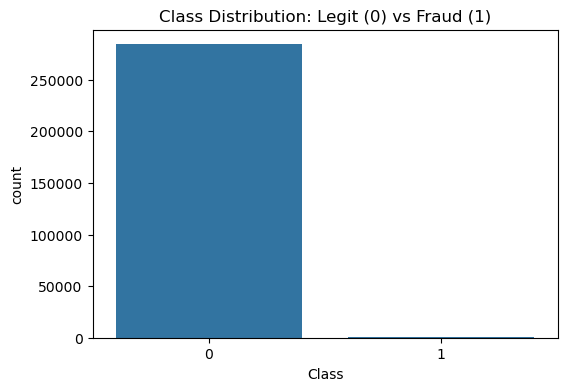

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution: Legit (0) vs Fraud (1)")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Optional: Check new class balance
from collections import Counter
print("After SMOTE:", Counter(y_train_resampled))

After SMOTE: Counter({0: 227451, 1: 227451})


In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



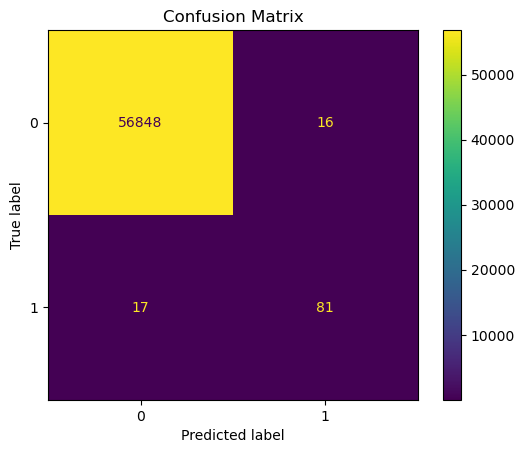

ROC AUC Score: 0.913124619572083


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC AUC Score
roc_score = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_score)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import joblib

MODEL_PATH = 'credit_default_model.pkl'
SCALER_PATH = 'scaler.pkl'
FEATURES_PATH = 'feature_columns.pkl'

joblib.dump(model, MODEL_PATH)
joblib.dump(scaler, SCALER_PATH)
joblib.dump(X.columns.tolist(), FEATURES_PATH)

print("Model, Scaler, and Feature Columns exported successfully!")

Model, Scaler, and Feature Columns exported successfully!
